In [ ]:
#dataset is available in googledrive; so drive is accessed from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Define paths to the dataset for tarin and test
train_dir = '/content/drive/MyDrive/AIDL assignment/Xray-non-xray-dataset/Xray_Classifier/Xray_Classifier/train'
test_dir = '/content/drive/MyDrive/AIDL assignment/Xray-non-xray-dataset/Xray_Classifier/Xray_Classifier/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/AIDL assignment/Xray-non-xray-dataset/Xray_Classifier/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/AIDL assignment/Xray-non-xray-dataset/Xray_Classifier/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/AIDL assignment/Xray-non-xray-dataset/Xray_Classifier/Xray_Classifier/test/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/AIDL assignment/Xray-non-xray-dataset/Xray_Classifier/Xray_Classifier/test/xray')))
#this list the no. of files in each folder from the path provided

621
565
551
575


In [ ]:
import tensorflow as tf #importing centerflow library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  #scaling th pixel values between 0-1
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir, #traning images folder
    target_size=(256,256), #resize all the images
    batch_size=32, # 32 images are processed in one time
    class_mode='binary',  # 'binary' for binary classification (Xrays vs. non-Xrays)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 949 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


In [ ]:
from tensorflow import keras #importing keras
from keras import Sequential #importing sequential model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout
#importing layers for the model

In [ ]:
# create CNN model - custom-made

model = Sequential()

#adding convulsions layer 1 and max pooling to reduce the spatial dimension by half
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#adding convulsions layer 2 and max pooling to reduce the spatial dimension by half
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#adding convulsions layer 3 and max pooling to reduce the spatial dimension by half
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#faltten the output to prepare it for the dense layer
model.add(Flatten())

#the dense layer is added
model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
#model compilation with learning rate of 0.001
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)
#traing the model with epoch as 20 so it go through dataset 10 times

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 372s 12s/step - accuracy: 0.7671 - loss: 0.5057 - val_accuracy: 0.9195 - val_loss: 0.2475
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 169s 5s/step - accuracy: 0.9878 - loss: 0.0460 - val_accuracy: 0.9788 - val_loss: 0.0853
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 165s 6s/step - accuracy: 0.9987 - loss: 0.0021 - val_accuracy: 0.9831 - val_loss: 0.1471
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 1.0000 - loss: 5.2714e-05 - val_accuracy: 0.9831 - val_loss: 0.1369
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 158s 5s/step - accuracy: 1.0000 - loss: 1.0090e-04 - val_accuracy: 0.9831 - val_loss: 0.1264
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 1.0000 - loss: 2.3906e-05 - val_accuracy: 0.9831 - val_loss: 0.1413
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 165s 6s/step - accuracy: 1.0000 - loss: 5.2403e-06 - val_accuracy: 0.9746 - val_loss: 0.1389
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 155s 5s/step - accuracy: 1.0000 - loss: 1.2313e-04 - val

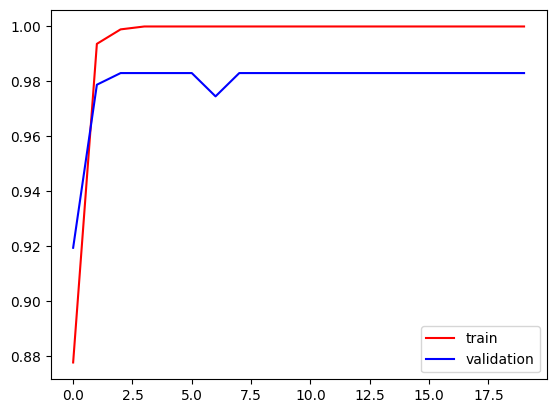

In [ ]:
import matplotlib.pyplot as plt #import library to plat graphs

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

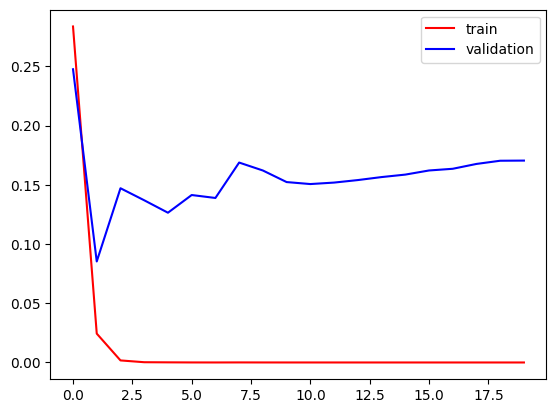

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#create ImageDataGenerator for the test dataset rescaling the pixels to range between 0 and 1
test_datagen = ImageDataGenerator(rescale=1./255)
#load and prepare the data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1125 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)

36/36 ━━━━━━━━━━━━━━━━━━━━ 343s 10s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes #getting acutal tables from the dataset.
predicted_labels = (predictions > 0.5).astype(int)  # converting output to 0 or 1, Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[273 278]
 [274 300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       551
           1       0.52      0.52      0.52       574

    accuracy                           0.51      1125
   macro avg       0.51      0.51      0.51      1125
weighted avg       0.51      0.51      0.51      1125



There is an overfitting

In [ ]:
# create CNN model

model = Sequential()
#adding convulsions layer 1 and max pooling to reduce the spatial dimension by half
#batchnormalization and maxpooling is used to avoid overfitting and reduce image size for all layers
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#adding convulsions layer 2 and max pooling to reduce the spatial dimension by half
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#adding convulsions layer 3 and max pooling to reduce the spatial dimension by half
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
#compilation model with learning rate as 0.001 for efficient training
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#training the model with 20 epochs the model will go through dataset 10 times.
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.8773 - loss: 1.1160 - val_accuracy: 0.6271 - val_loss: 6.0115
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 244s 8s/step - accuracy: 0.9897 - loss: 0.2067 - val_accuracy: 0.7712 - val_loss: 4.7752
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.9863 - loss: 0.3257 - val_accuracy: 0.7839 - val_loss: 4.5107
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 237s 8s/step - accuracy: 0.9958 - loss: 0.1414 - val_accuracy: 0.6737 - val_loss: 5.3417
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 235s 8s/step - accuracy: 0.9924 - loss: 0.3843 - val_accuracy: 0.6144 - val_loss: 8.3085
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 238s 8s/step - accuracy: 0.9981 - loss: 0.1311 - val_accuracy: 0.5169 - val_loss: 68.9651
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 260s 8s/step - accuracy: 0.9885 - loss: 0.8014 - val_accuracy: 0.4788 - val_loss: 39.9951
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 240s 8s/step - accuracy: 0.9961 - loss: 0.2100 - val_accuracy: 0.4831 -

In [ ]:
#create ImageDataGenerator for the test dataset rescaling the pixels to range between 0 and 1
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1125 images belonging to 2 classes.


In [ ]:
#predicting the test data
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes #getting acutal tables from the dataset.
predicted_labels = (predictions > 0.5).astype(int)  #converting output to 0 or 1, Adjust the threshold as needed
# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[264 287]
 [281 293]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       551
           1       0.51      0.51      0.51       574

    accuracy                           0.50      1125
   macro avg       0.49      0.49      0.49      1125
weighted avg       0.50      0.50      0.50      1125



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

#creating sequential model
resnet_model = Sequential()    #ResNet50 is a pre-trained model
#loading the ResNet50 pretrained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
#freezing all layers of the pretrained resnet50 model to get the orignal weight
for layer in pretrained_model.layers:
    layer.trainable = False  #avoiding these layers from being updated during training

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 316s 10s/step - accuracy: 0.5339 - loss: 3.3740 - val_accuracy: 0.6229 - val_loss: 0.7458
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 325s 11s/step - accuracy: 0.7406 - loss: 0.5405 - val_accuracy: 0.7797 - val_loss: 0.4466
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 320s 11s/step - accuracy: 0.8076 - loss: 0.3976 - val_accuracy: 0.6737 - val_loss: 0.6563
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 307s 10s/step - accuracy: 0.8604 - loss: 0.3186 - val_accuracy: 0.8093 - val_loss: 0.3905
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 301s 10s/step - accuracy: 0.9038 - loss: 0.2468 - val_accuracy: 0.8432 - val_loss: 0.3990
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 327s 11s/step - accuracy: 0.8761 - loss: 0.2851 - val_accuracy: 0.8517 - val_loss: 0.3459
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 322s 11s/step - accuracy: 0.9538 - loss: 0.1800 - val_accuracy: 0.8602 - val_loss: 0.3325
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 324s 11s/step - accuracy: 0.9433 - loss: 0.1680 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

36/36 ━━━━━━━━━━━━━━━━━━━━ 298s 8s/step


In [ ]:
# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[274 277]
 [316 258]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       551
           1       0.48      0.45      0.47       574

    accuracy                           0.47      1125
   macro avg       0.47      0.47      0.47      1125
weighted avg       0.47      0.47      0.47      1125

